In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [2]:
train_date = pd.read_csv('C:/Users/wgkdj/smbc_comp/input/train.csv')
test_date = pd.read_csv('C:/Users/wgkdj/smbc_comp/input/test.csv')

## EDAします
データのサイズ
train (19984, 22) 
test (19702, 21)
二万件のデータなのでデータ数はあまり多くない印象を受ける(合計4万件)
データの中身は大きく分けて２種類に分類できそう　木のデータと木の生えている地域のデータ


データは３値分類です
health
1    15751
0     3535
2      698
0:Fair（普通） 1:Good（良い） 2:Poor（悪い）１が多くなかなかやりおる

---null---
steward       14883  木の管理者
guards        14943　木のガードの有無　種類
problems      12243　木の病気など
----------

train_testで期間の差はない
2015/5　から　2016/10までなので約1か月半の間

ラテン名と一般名称での表記ゆれはなさそうに（軽く見ただけなので要検証してください）

どこに植えている木かというとニューヨーク州である　→　公園内部と歩道の大きく分けて二種類の場所に植えられている

#####公園内######
South Ozone Park    145　train_date[train_date['zip_city'].str.contains('park', case=False)]
Ozone Park          129
Rockaway Park        84
Rego Park            48
Floral Park          33
Central Park         21
################

木の記録をつけている人が違う　→　人によって基準が違うかもしれない　
おそらく同じ木のデータはなさそう
tree_dbh = 立木に人間が並んで立った時、人の胸の位置に当たる樹幹の部分の直径


In [3]:
train_date.isnull().sum()

Unnamed: 0        0
created_at        0
tree_dbh          0
curb_loc          0
health            0
steward       14883
guards        14943
sidewalk          0
user_type         0
problems      12243
spc_common        0
spc_latin         0
nta               0
nta_name          0
borocode          0
boro_ct           0
boroname          0
zip_city          0
cb_num            0
st_senate         0
st_assem          0
cncldist          0
dtype: int64

In [4]:
train_date.dtypes

Unnamed: 0     int64
created_at    object
tree_dbh       int64
curb_loc      object
health         int64
steward       object
guards        object
sidewalk      object
user_type     object
problems      object
spc_common    object
spc_latin     object
nta           object
nta_name      object
borocode       int64
boro_ct        int64
boroname      object
zip_city      object
cb_num         int64
st_senate      int64
st_assem       int64
cncldist       int64
dtype: object

In [5]:
train_date.head()

,Unnamed: 0,created_at,tree_dbh,curb_loc,health,steward,guards,sidewalk,user_type,problems,spc_common,spc_latin,nta,nta_name,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist
0,0,2015-06-29,14,OnCurb,1,NaN,NaN,Damage,Volunteer,NaN,English oak,Quercus robur,QN45,Douglas Manor-Douglaston-Little Neck,4,4152901,Queens,Little Neck,411,11,25,23
1,1,2016-09-21,5,OnCurb,1,3or4,Helpful,NoDamage,Volunteer,NaN,crimson king maple,Acer platanoides 'Crimson King',BX05,Bedford Park-Fordham North,2,2039901,Bronx,Bronx,207,33,78,15
2,2,2015-09-13,26,OnCurb,2,NaN,NaN,NoDamage,Volunteer,StonesBranchLights,English oak,Quercus robur,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,5,5017011,Staten Island,Staten Island,503,24,62,51
3,3,2016-05-09,15,OnCurb,0,NaN,NaN,Damage,NYC Parks Staff,NaN,honeylocust,Gleditsia triacanthos var. inermis,SI11,Charleston-Richmond Valley-Tottenville,5,5024401,Staten Island,Staten Island,503,24,62,51
4,4,2016-06-24,23,OnCurb,1,NaN,NaN,NoDamage,Volunteer,Stones,London planetree,Platanus x acerifolia,MN03,Central Harlem North-Polo Grounds,1,1022102,Manhattan,New York,110,30,70,9


In [6]:
test_date.head()

,Unnamed: 0,created_at,tree_dbh,curb_loc,steward,guards,sidewalk,user_type,problems,spc_common,spc_latin,nta,nta_name,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist
0,19984,2015-09-08,15,OnCurb,NaN,NaN,Damage,NYC Parks Staff,NaN,Callery pear,Pyrus calleryana,BK17,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,3,3062000,Brooklyn,Brooklyn,315,22,45,48
1,19985,2015-10-15,5,OnCurb,1or2,NaN,NoDamage,Volunteer,NaN,cherry,Prunus,BX62,Woodlawn-Wakefield,2,2045101,Bronx,Bronx,212,34,81,11
2,19986,2016-08-03,4,OnCurb,NaN,Unsure,NoDamage,Volunteer,NaN,littleleaf linden,Tilia cordata,QN60,Kew Gardens,4,4013800,Queens,Kew Gardens,409,14,27,29
3,19987,2015-08-06,7,OnCurb,NaN,NaN,NoDamage,TreesCount Staff,NaN,dawn redwood,Metasequoia glyptostroboides,BK09,Brooklyn Heights-Cobble Hill,3,3000301,Brooklyn,Brooklyn,302,26,52,33
4,19988,2015-10-21,6,OnCurb,1or2,Helpful,NoDamage,TreesCount Staff,Stones,purple-leaf plum,Prunus cerasifera,BK75,Bedford,3,3025100,Brooklyn,Brooklyn,303,25,56,36


In [7]:
train_date['created_at'] = pd.to_datetime(train_date['created_at'])
test_date['created_at'] = pd.to_datetime(test_date['created_at'])

In [8]:
train_date.sample(5)

,Unnamed: 0,created_at,tree_dbh,curb_loc,health,steward,guards,sidewalk,user_type,problems,spc_common,spc_latin,nta,nta_name,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist
9808,9808,2015-10-14,7,OnCurb,1,NaN,NaN,Damage,TreesCount Staff,NaN,London planetree,Platanus x acerifolia,BK45,Georgetown-Marine Park-Bergen Beach-Mill Basin,3,3068600,Brooklyn,Brooklyn,318,19,59,46
1157,1157,2015-11-30,17,OnCurb,1,NaN,NaN,NoDamage,Volunteer,RootOther,honeylocust,Gleditsia triacanthos var. inermis,QN50,Elmhurst-Maspeth,4,4024300,Queens,Woodside,402,15,30,30
3744,3744,2016-08-31,15,OnCurb,0,NaN,NaN,NoDamage,NYC Parks Staff,StonesRootOther,pin oak,Quercus palustris,SI07,Westerleigh,5,5020100,Staten Island,Staten Island,501,23,61,49
12539,12539,2016-07-15,2,OnCurb,1,NaN,NaN,NoDamage,Volunteer,BranchLights,silver maple,Acer saccharinum,SI25,Oakwood-Oakwood Beach,5,5013800,Staten Island,Staten Island,503,24,62,50
10622,10622,2015-09-27,6,OnCurb,1,NaN,NaN,Damage,NYC Parks Staff,NaN,Japanese zelkova,Zelkova serrata,QN56,Ozone Park,4,4005800,Queens,Ozone Park,410,15,23,32


In [22]:
train_date['curb_loc'].value_counts()

curb_loc
OnCurb            18777
OffsetFromCurb     1207
Name: count, dtype: int64

In [23]:
train_date['sidewalk'].value_counts()

sidewalk
NoDamage    10689
Damage       9295
Name: count, dtype: int64

#########################################木の胸高直径####################################################

In [9]:
train_date['tree_dbh'].describe()

count    19984.000000
mean        11.694906
std          8.198150
min          1.000000
25%          5.000000
50%          9.000000
75%         17.000000
max         42.000000
Name: tree_dbh, dtype: float64

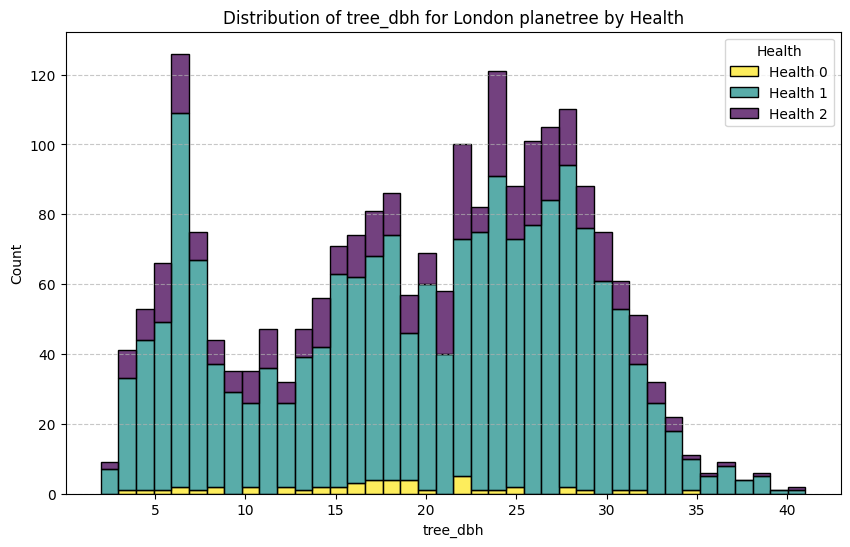

In [10]:
london_planetree_data = train_date[train_date['spc_common'] == 'London planetree']
# ヒストグラムを作成（tree_dbhは数値型なので注意）
plt.figure(figsize=(10, 6))
sns.histplot(data=london_planetree_data, x='tree_dbh', hue='health', multiple='stack',palette='viridis',bins=40)
plt.title('Distribution of tree_dbh for London planetree by Health')
plt.xlabel('tree_dbh')
plt.ylabel('Count')

# 凡例を表示
plt.legend(title='Health', loc='upper right', labels=['Health 0', 'Health 1', 'Health 2'])

# グリッドを表示
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

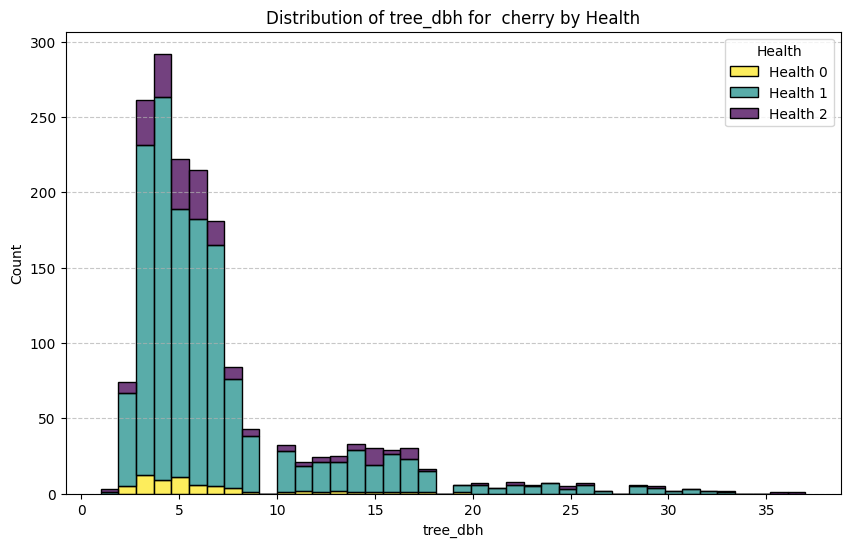

In [11]:
cherry_data = train_date[train_date['spc_common'] == 'cherry']
# ヒストグラムを作成（tree_dbhは数値型なので注意）
plt.figure(figsize=(10, 6))
sns.histplot(data=cherry_data, x='tree_dbh', hue='health', multiple='stack',palette='viridis',bins=40)
plt.title('Distribution of tree_dbh for  cherry by Health')
plt.xlabel('tree_dbh')
plt.ylabel('Count')

# 凡例を表示
plt.legend(title='Health', loc='upper right', labels=['Health 0', 'Health 1', 'Health 2'])

# グリッドを表示
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

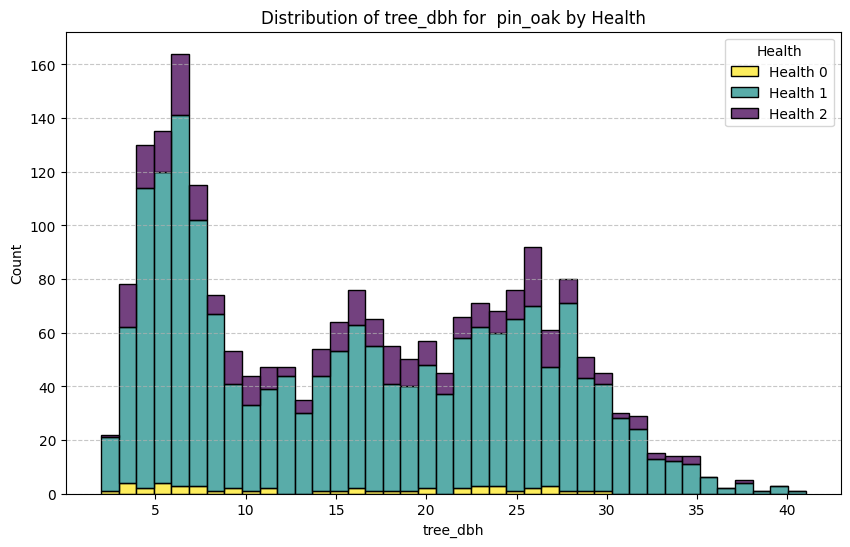

In [12]:
pin_oak_data = train_date[train_date['spc_common'] == 'pin oak']
# ヒストグラムを作成（tree_dbhは数値型なので注意）
plt.figure(figsize=(10, 6))
sns.histplot(data=pin_oak_data, x='tree_dbh', hue='health', multiple='stack',palette='viridis',bins=40)
plt.title('Distribution of tree_dbh for  pin_oak by Health')
plt.xlabel('tree_dbh')
plt.ylabel('Count')

# 凡例を表示
plt.legend(title='Health', loc='upper right', labels=['Health 0', 'Health 1', 'Health 2'])

# グリッドを表示
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

木の胸高経だけではわからない　おそらく子供の木や大人の木が混じっているように思う
木の種類ごとに見てみたが分布の違いがあり、それぞれの木で評価するのがいいのではないか？
サクラの木はほか二つの分布から見て５付近に分布が位置している
#####################################################################

In [13]:
train_date['problems'].value_counts()

problems
Stones                                                       2219
BranchLights                                                 1036
StonesBranchLights                                            762
BranchOther                                                   408
RootOther                                                     333
StonesTrunkOther                                              230
RootOtherTrunkOtherBranchOther                                190
TrunkOther                                                    183
StonesBranchOther                                             180
StonesRootOther                                               173
WiresRope                                                     163
StonesWiresRopeBranchLights                                   147
MetalGrates                                                   139
WiresRopeBranchLights                                          95
RootOtherTrunkOther                                            92
T

problemsの種類は多いと見せかけてあまり多くない　すべてこの値の組み合わせだ（StonesSneakersだけSneakersがある）
Stones
BranchLights
BranchOther
RootOther
TrunkOther
WiresRope
MetalGrates
TrunkLights

In [15]:
train_date['problems'].fillna(' ', inplace=True)

In [16]:
problem = ["Stones", "BranchLights", "BranchOther", "RootOther", "TrunkOther", "WiresRope", "MetalGrates", "TrunkLights"]
for substring in problem:
    train_date[substring] = train_date['problems'].apply(lambda row: 1 if substring in row else 0)

# X['errors?'] = X['errors?'].apply(lambda x: 1 if x == 'ERROR' else 0)

In [21]:
train_date.dtypes

Unnamed: 0               int64
created_at      datetime64[ns]
tree_dbh                 int64
curb_loc                object
health                   int64
steward                 object
guards                  object
sidewalk                object
user_type               object
problems                object
spc_common              object
spc_latin               object
nta                     object
nta_name                object
borocode                 int64
boro_ct                  int64
boroname                object
zip_city                object
cb_num                   int64
st_senate                int64
st_assem                 int64
cncldist                 int64
Stones                   int64
BranchLights             int64
BranchOther              int64
RootOther                int64
TrunkOther               int64
WiresRope                int64
MetalGrates              int64
TrunkLights              int64
dtype: object

In [ ]:
filtered_data = train_date[train_date['zip_city'].str.contains('South Ozone Park', case=False)]

In [ ]:
filtered_data[filtered_data['tree_dbh'] == 6]

,Unnamed: 0,created_at,tree_dbh,curb_loc,health,steward,guards,sidewalk,user_type,problems,spc_common,spc_latin,nta,nta_name,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist
1008,1008,2016-09-02,6,OnCurb,1,NaN,NaN,Damage,TreesCount Staff,NaN,pin oak,Quercus palustris,QN55,South Ozone Park,4,4081800,Queens,South Ozone Park,410,10,31,28
2135,2135,2015-09-26,6,OnCurb,1,NaN,NaN,NoDamage,TreesCount Staff,NaN,American linden,Tilia americana,QN55,South Ozone Park,4,4081400,Queens,South Ozone Park,410,10,31,28
2293,2293,2015-12-21,6,OnCurb,1,1or2,NaN,NoDamage,NYC Parks Staff,NaN,Chinese elm,Ulmus parvifolia,QN55,South Ozone Park,4,4081400,Queens,South Ozone Park,410,10,31,28
2439,2439,2016-08-29,6,OffsetFromCurb,0,1or2,Helpful,NoDamage,TreesCount Staff,NaN,American linden,Tilia americana,QN55,South Ozone Park,4,4081800,Queens,South Ozone Park,410,10,31,28
2652,2652,2016-06-15,6,OffsetFromCurb,2,NaN,NaN,NoDamage,Volunteer,NaN,cherry,Prunus,QN55,South Ozone Park,4,4016800,Queens,South Ozone Park,410,10,31,28
5601,5601,2016-06-23,6,OnCurb,1,1or2,Harmful,NoDamage,Volunteer,NaN,Callery pear,Pyrus calleryana,QN55,South Ozone Park,4,4010200,Queens,South Ozone Park,410,10,31,28
5705,5705,2016-06-10,6,OnCurb,1,1or2,Helpful,NoDamage,Volunteer,NaN,Sophora,Styphnolobium japonicum,QN55,South Ozone Park,4,4081800,Queens,South Ozone Park,410,10,31,28
6808,6808,2016-06-25,6,OnCurb,1,NaN,Helpful,NoDamage,Volunteer,BranchLights,white pine,Pinus strobus,QN55,South Ozone Park,4,4081800,Queens,South Ozone Park,410,10,31,28
7422,7422,2016-06-27,6,OnCurb,1,NaN,Unsure,Damage,TreesCount Staff,NaN,London planetree,Platanus x acerifolia,QN55,South Ozone Park,4,4083800,Queens,South Ozone Park,410,10,31,32
7573,7573,2015-09-25,6,OnCurb,1,1or2,NaN,Damage,Volunteer,BranchLights,green ash,Fraxinus pennsylvanica,QN55,South Ozone Park,4,4081400,Queens,South Ozone Park,410,10,31,28


In [ ]:
filtered_data['health'].value_counts()

health
1    112
0     23
2     10
Name: count, dtype: int64

In [ ]:
filtered_data['zip_city'].value_counts()

zip_city
South Ozone Park    145
Name: count, dtype: int64

In [ ]:
filtered_data['spc_common'].value_counts()

spc_common
cherry                    16
English oak               14
pin oak                   12
green ash                 10
Norway maple               8
white pine                 7
London planetree           7
honeylocust                7
littleleaf linden          7
American linden            6
Callery pear               5
Sophora                    5
Japanese zelkova           4
purple-leaf plum           3
silver maple               3
Chinese elm                3
Japanese tree lilac        3
ginkgo                     3
silver linden              2
Kentucky coffeetree        2
sweetgum                   2
willow oak                 2
swamp white oak            2
ash                        1
red horse chestnut         1
blue spruce                1
red maple                  1
'Schubert' chokecherry     1
dawn redwood               1
American elm               1
Japanese maple             1
silver birch               1
Turkish hazelnut           1
hedge maple                1
Okl

In [ ]:
train_date['spc_common'].unique().size

120

In [ ]:
train_date['spc_latin'].unique().size

120

In [ ]:
train_date['spc_common'].value_counts()

spc_common
London planetree          2237
pin oak                   2140
cherry                    1689
Japanese zelkova          1470
littleleaf linden         1303
English oak               1277
green ash                 1089
Callery pear              1076
honeylocust               1034
Norway maple               634
Sophora                    545
ginkgo                     517
silver maple               422
American elm               407
American linden            336
red maple                  278
sweetgum                   219
silver linden              203
purple-leaf plum           196
Chinese elm                192
swamp white oak            183
maple                      165
crimson king maple         135
eastern redbud             116
'Schubert' chokecherry      98
Japanese tree lilac         93
crab apple                  90
dawn redwood                89
northern red oak            88
Siberian elm                81
willow oak                  62
sugar maple                 

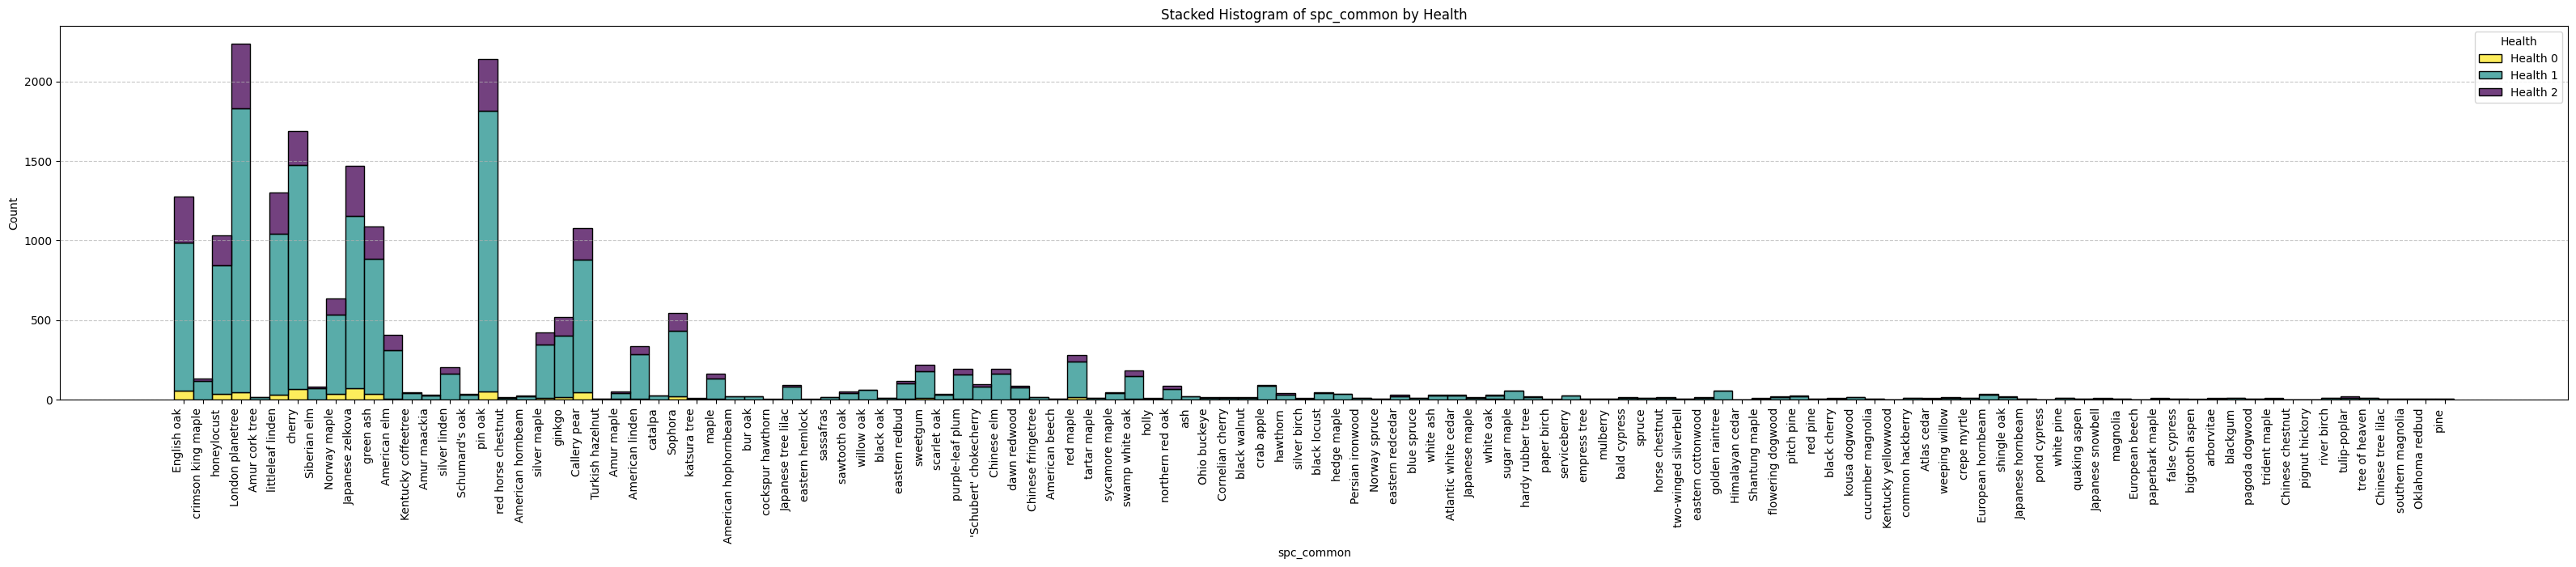

In [ ]:
plt.figure(figsize=(40, 6))
sns.histplot(data=train_date, x='spc_common', hue='health', multiple='stack', palette='viridis')
plt.title('Stacked Histogram of spc_common by Health')
plt.xlabel('spc_common')
plt.ylabel('Count')

# 凡例を表示
plt.legend(title='Health', loc='upper right', labels=['Health 0', 'Health 1', 'Health 2'])

# X軸のラベルを回転
plt.xticks(rotation=90, ha='right')

# グリッドを表示
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

木によって健康か不健康かこの図のみではわからない

In [ ]:
train_date['nta'].value_counts()

nta
SI54    368
SI11    359
BK82    326
BK45    306
SI32    306
SI01    300
MN12    292
QN46    285
MN40    281
QN17    267
SI05    260
QN49    246
QN21    235
QN45    222
BK37    220
BK42    216
SI36    214
QN15    213
BK31    213
BK75    213
QN42    211
SI48    211
SI07    206
QN20    195
SI35    191
SI25    191
QN55    190
BK33    189
QN43    186
QN03    185
BK61    180
QN57    178
SI28    175
SI24    174
QN37    165
BX09    165
BK32    165
QN05    165
BK35    164
QN51    163
SI22    161
QN44    161
QN38    159
BX52    154
BK83    152
MN25    151
QN31    150
SI37    149
BK58    144
BK17    143
QN08    139
SI12    138
QN19    137
QN66    134
BK76    131
SI45    128
BK69    127
QN48    125
BX27    125
BK85    123
MN24    122
BX36    122
BK88    121
QN01    120
SI08    120
BX10    119
BK79    119
QN56    118
BK90    117
QN23    116
MN34    114
QN06    114
BK72    113
MN23    111
QN72    111
BX31    108
QN34    105
QN30    104
BK77    104
QN10    103
BX59    101
QN28    101
MN15     98


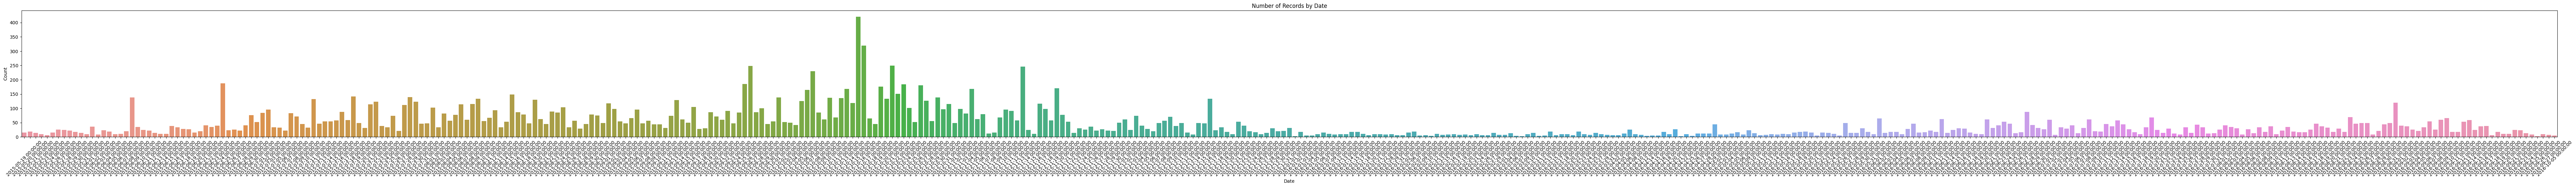

In [ ]:
# 日付ごとの可視化
date_counts = train_date['created_at'].value_counts().sort_index()

# 棒グラフで可視化
plt.figure(figsize=(100, 5))
sns.barplot(x=date_counts.index, y=date_counts.values)
plt.title('Number of Records by Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)  # X軸の日付表示を回転させる（任意）

plt.show()

<Figure size 2000x700 with 0 Axes>

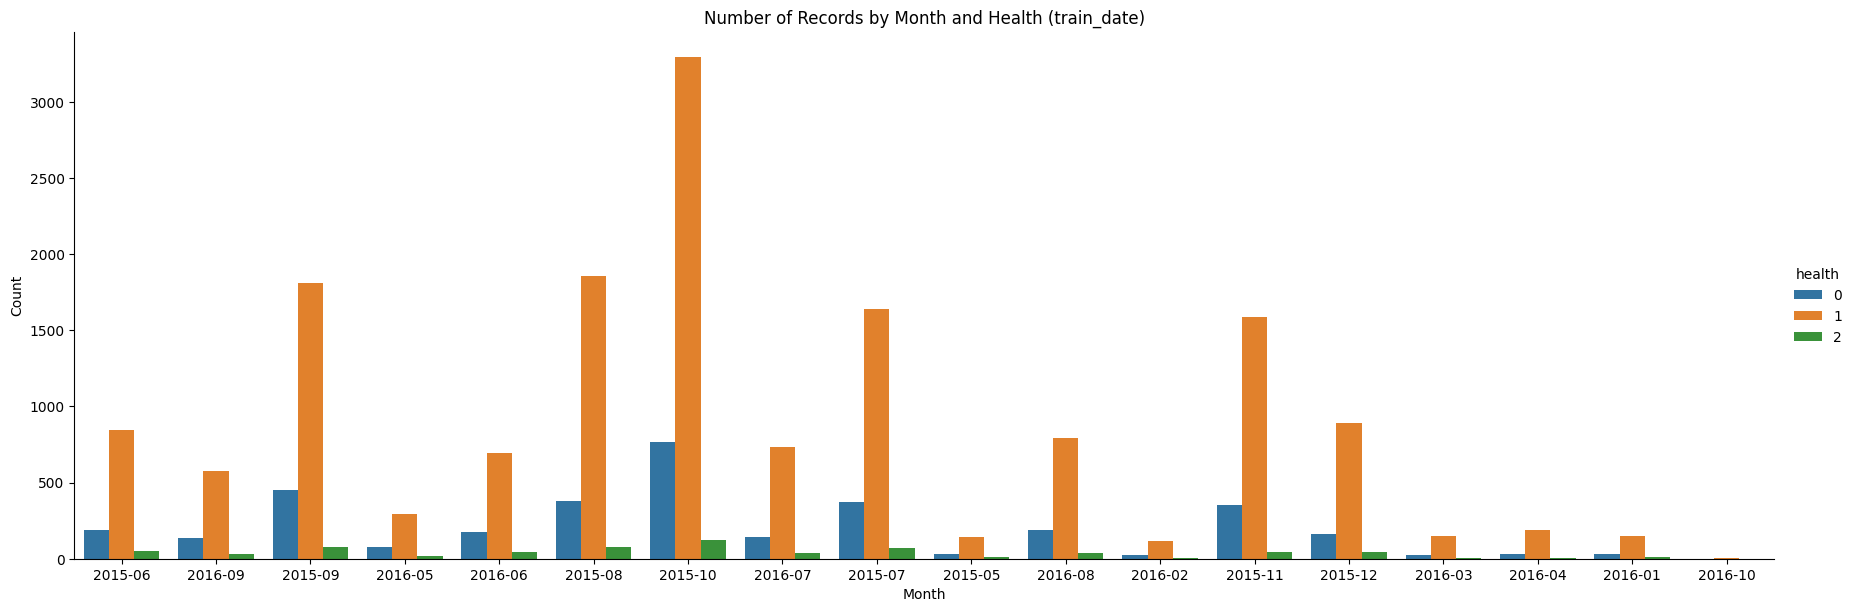

In [ ]:
train_date['Month'] = train_date['created_at'].dt.to_period('M')

# catplotで可視化
plt.figure(figsize=(20, 7))
sns.catplot(x='Month', hue='health', kind='count', data=train_date, height=6, aspect=3)
plt.title('Number of Records by Month and Health (train_date)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

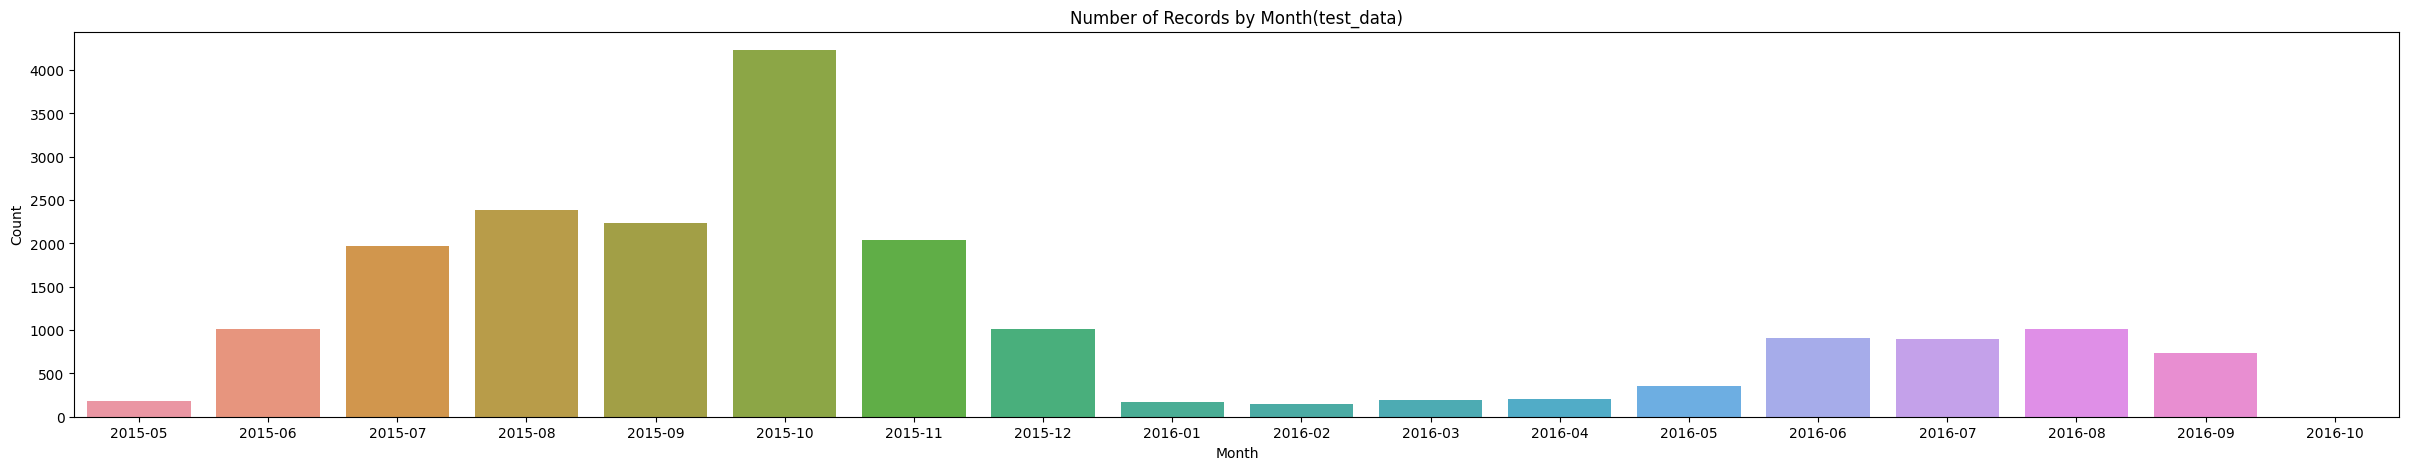

In [ ]:
test_date['Month'] = test_date['created_at'].dt.to_period('M')

# 月ごとのデータを集計
monthly_test_data = test_date.groupby('Month').size()

# 棒グラフで可視化
plt.figure(figsize=(30, 5))
sns.barplot(x=monthly_test_data.index.astype(str), y=monthly_test_data.values)
plt.title('Number of Records by Month(test_data)')
plt.xlabel('Month')
plt.ylabel('Count')

plt.show()

C:\Users\wgkdj\AppData\Local\Temp\ipykernel_7112\3716565122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Month'] = filtered_data['created_at'].dt.to_period('M')


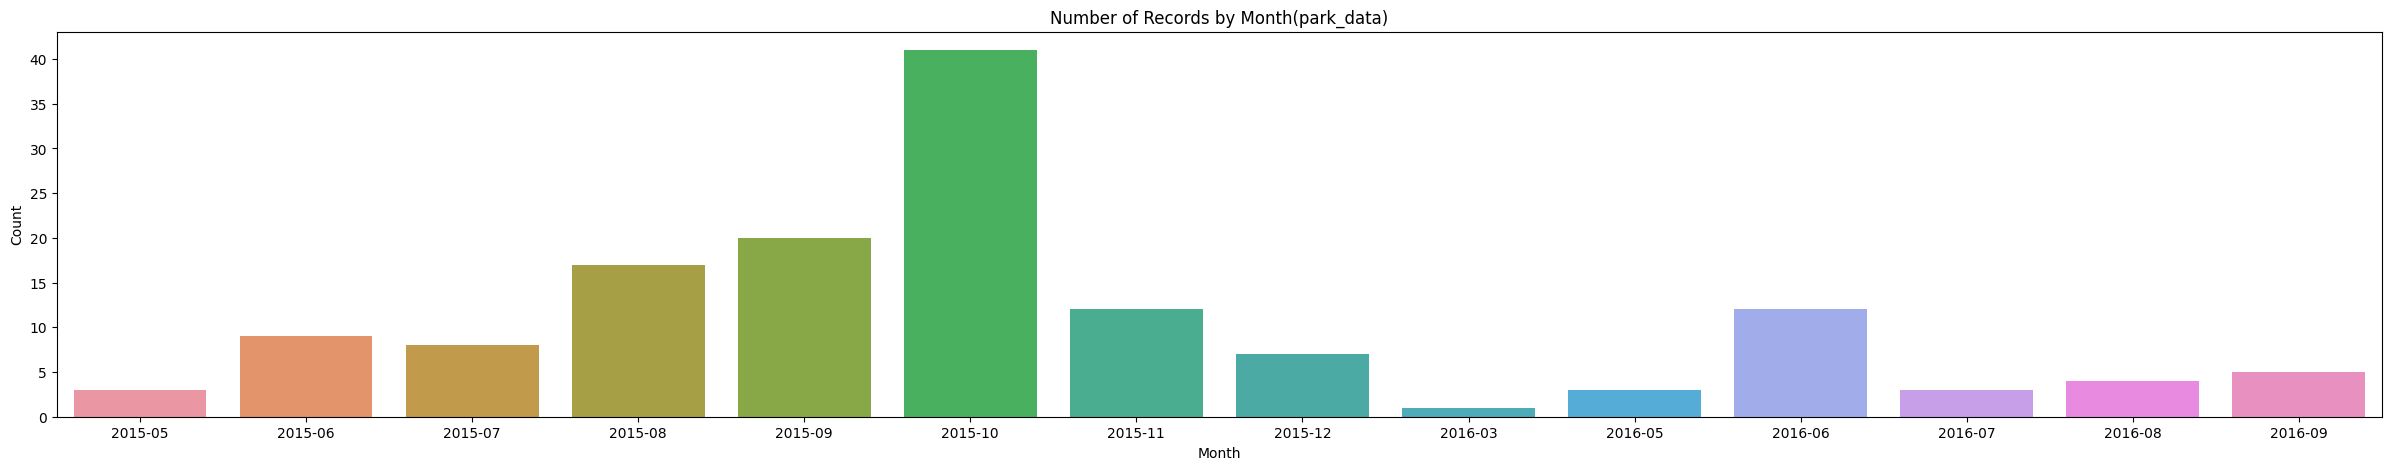

In [ ]:
filtered_data['Month'] = filtered_data['created_at'].dt.to_period('M')

# 月ごとのデータを集計
monthly_filtered_data = filtered_data.groupby('Month').size()

# 棒グラフで可視化
plt.figure(figsize=(30, 5))
sns.barplot(x=monthly_filtered_data.index.astype(str), y=monthly_filtered_data.values)
plt.title('Number of Records by Month(park_data)')
plt.xlabel('Month')
plt.ylabel('Count')

plt.show()

日付について..
#分布はトレーニングとテストで期間は変わらず、分布も似通っている。このことから同時期にとられたデータをなんらかの規則で分けたのではないかと推察する
データが作成された日付が10月めっちゃ多い　→　何らかの理由があるはずでは？
なぜか2016年のデータが前年の2015年の同じ月に比べて少ない　→　何らかの理由があるはずでは？　気温が関係していると思われる　←　NYCのみのデータだから気温はNYCのみ見ればオーケイ